# T<sub>2</sub> Ramsey Characterization

The purpose of the $T_2$Ramsey experiment is to determine two of the qubit's properties: *Ramsey* or *detuning frequency* and $T_2^\ast$. The rough frequency of the qubit was already determined previously. The control pulses are based on this frequency. 

In this experiment, we would like to get a more precise estimate of the qubit's frequency. The difference between the frequency used for the control rotation pulses, and the precise frequency is called the *detuning frequency*. This part of the experiment is called a *Ramsey Experiment*. $T_2^\ast$ represents the rate of decay toward a mixed state, when the qubit is initialized to the $\left|1\right\rangle$ state.

Since the detuning frequency is relatively small, we add a phase gate to the circuit to enable better measurement. The actual frequency measured is the sum of the detuning frequency and the user induced *oscillation frequency* (`osc_freq` parameter).

In [3]:
import numpy as np
import qiskit
from qiskit_experiments.library import T2Ramsey

The circuit used for the experiment comprises the following:

    1. Hadamard gate
    2. delay
    3. RZ gate that rotates the qubit in the x-y plane 
    4. Hadamard gate
    5. measurement

The user provides as input a series of delays (in seconds) and the oscillation frequency (in Hz). During the delay, we expect the qubit to precess about the z-axis. If the p gate and the precession offset each other perfectly, then the qubit will arrive at the $\left|0\right\rangle$ state (after the second Hadamard gate). By varying the extension of the delays, we get a series of oscillations of the qubit state between the $\left|0\right\rangle$ and $\left|1\right\rangle$ states. We can draw the graph of the resulting function, and can analytically extract the desired values.

In [4]:
qubit = 0
# set the desired delays
delays = list(np.arange(1e-6, 50e-6, 1e-6))

In [5]:
# Create a T2Ramsey experiment. Print the first circuit as an example
exp1 = T2Ramsey(qubit, delays, osc_freq=1e5)
print(exp1.circuits()[0])

     ┌───┐┌─────────────────┐┌─────────┐ ░ ┌───┐ ░ ┌─┐
  q: ┤ H ├┤ Delay(1e-06[s]) ├┤ Rz(π/5) ├─░─┤ H ├─░─┤M├
     └───┘└─────────────────┘└─────────┘ ░ └───┘ ░ └╥┘
c: 1/═══════════════════════════════════════════════╩═
                                                    0 


We run the experiment on a simple, simulated backend, created specifically for this experiment's tutorial.

In [7]:
from qiskit_experiments.test.t2ramsey_backend import T2RamseyBackend
# FakeJob is a wrapper for the backend, to give it the form of a job
from qiskit_experiments.test.utils import FakeJob

# The behavior of the backend is determined by the following parameters
backend = T2RamseyBackend(
    p0={
        "A": [0.5],
        "T2star": [20e-6],
        "f": [100100],
        "phi": [0.0],
        "B": [0.5],
    },
    initial_prob_plus=[0.0],
    readout0to1=[0.02],
    readout1to0=[0.02]
)

The resulting graph will have the form:
$f(t) = a^{-t/T_2*} \cdot \cos(2 \pi f t + \phi) + b$
where *t* is the delay, $T_2^\ast$ is the decay factor, and *f* is the detuning frequency.

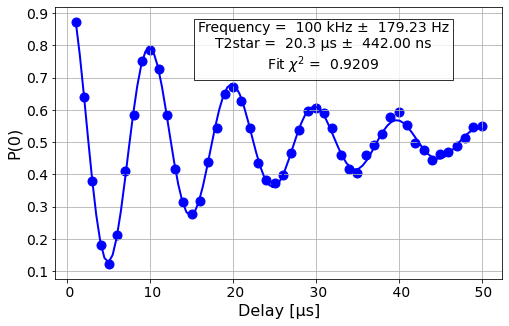

In [8]:
expdata1 = exp1.run(backend=backend, shots=2000)
expdata1.block_for_results()  # Wait for job/analysis to finish.

# Display the figure
display(expdata1.figure(0))

In [9]:
# Print results
for result in expdata1.analysis_results():
    print(result)

DbAnalysisResultV1
- name: @Parameters_T2RamseyAnalysis
- value: [ 4.76195058e-01  5.01091305e-01  2.03265836e-05  1.00410831e+05
 -2.31712461e-02] ± [6.23807790e-03 1.52343668e-03 4.41997916e-07 1.79229097e+02
 1.45903369e-02]
- χ²: 0.920854727025373
- quality: good
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 100410.83059462237 ± 179.22909697719712 Hz
- χ²: 0.920854727025373
- quality: good
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: T2star
- value: 2.0326583583409876e-05 ± 4.419979162771111e-07 s
- χ²: 0.920854727025373
- quality: good
- device_components: ['Q0']
- verified: False


### Providing initial user estimates
The user can provide initial estimates for the parameters to help the analysis process. Because the curve is expected to decay toward $0.5$, the natural choice for parameters $A$ and $B$ is $0.5$. Varying the value of $\phi$ will shift the graph along the x-axis. Since this is not of interest to us, we can safely initialize $\phi$ to 0. In this experiment, `t2ramsey` and `f` are the parameters of interest. Good estimates for them are values computed in previous experiments on this qubit or a similar values computed for other qubits.

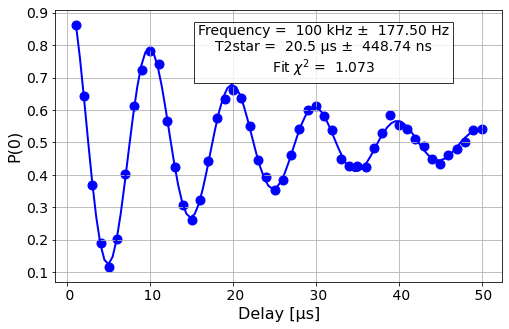

In [11]:
from qiskit_experiments.library.characterization import T2RamseyAnalysis
user_p0={
    "A": 0.5,
    "T2star": 20e-6,
    "f": 110000,
    "phi": 0,
    "B": 0.5
        }
exp_with_p0 = T2Ramsey(qubit, delays, osc_freq=1e5)
exp_with_p0.analysis.set_options(p0=user_p0)
expdata_with_p0 = exp_with_p0.run(backend=backend, shots=2000)
expdata_with_p0.block_for_results()

# Display fit figure
display(expdata_with_p0.figure(0))

In [12]:
# Print results
for result in expdata_with_p0.analysis_results():
    print(result)

DbAnalysisResultV1
- name: @Parameters_T2RamseyAnalysis
- value: [ 4.75079813e-01  4.98234022e-01  2.05287241e-05  1.00208063e+05
 -1.33480413e-02] ± [6.26841353e-03 1.52335745e-03 4.48734921e-07 1.77505428e+02
 1.45744909e-02]
- χ²: 1.0725034677926117
- quality: good
- extra: <4 items>
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: Frequency
- value: 100208.06296861691 ± 177.50542777064467 Hz
- χ²: 1.0725034677926117
- quality: good
- device_components: ['Q0']
- verified: False
DbAnalysisResultV1
- name: T2star
- value: 2.052872412506479e-05 ± 4.4873492119964766e-07 s
- χ²: 1.0725034677926117
- quality: good
- device_components: ['Q0']
- verified: False


In [13]:
import qiskit.tools.jupyter
%qiskit_copyright